In [138]:
# Import Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import seaborn as sns
%matplotlib inline

#### Read and Manipulate the raw data before answering questions 

In [139]:
# Read the raw data
grove = pd.read_csv("/Users/dennishou/Desktop/Grove_Analytics.csv")
# Rename the column
grove.rename(columns={'Shipment Number':'Shipment_Number','Customer ID':'Customer_ID'
                     ,'Shipment Date':'Shipment_Date'
                     ,'Order Value':'Order_Value'
                     ,'Acquisition channel group':'Acquisition_channel_group'},inplace=True)
grove['Shipment_Date'] = pd.to_datetime(grove['Shipment_Date'])
# Create a weekly period column based on the Shipment Date
grove['Shipment_Week'] = grove.Shipment_Date.apply(lambda x: x.strftime('%W'))
# Remove dollar sign from the raw data and transform to float data type 
grove['Order_Value'] = grove[grove.columns[3]].replace('[\$,]', '', regex=True).astype(float)

In [140]:
# Determine the customer's weekly cohort group (based on their first order) 
grove.set_index('Customer_ID', inplace=True)
grove['First_Shipment_Week'] = grove.groupby(level=0)['Shipment_Date'].min().apply(lambda x: x.strftime('%W'))
grove.reset_index(inplace=True)
grove.head()

,Customer_ID,Shipment_Number,Shipment_Date,Order_Value,Acquisition_channel_group,Shipment_Week,First_Shipment_Week
0,17190313,1,2018-06-01,37.50,1.0,22,22
1,17246417,1,2018-06-01,26.11,2.0,22,22
2,16481211,1,2018-06-01,21.86,3.0,22,22
3,17211589,2,2018-07-03,30.89,2.0,27,22
4,17211589,3,2018-09-08,230.88,2.0,36,22


In [141]:
# Aggregate the data by weekly cohorts and shipment week
grouped = grove.groupby(['First_Shipment_Week', 'Shipment_Week'])
cohorts = grouped.agg({'Customer_ID': pd.Series.nunique,
                       'Order_Value': np.sum})

cohorts.rename(columns={'Customer_ID': 'TotalCustomers',
                        'Order_Value': 'Revenue'}, inplace=True)

In [142]:
# Label the cohort period for each cohorts 
def cohort_period(grove):

    grove['CohortPeriod'] = np.arange(len(grove)) + 1
    return grove

cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [143]:
# Reindex the data frame
cohorts.reset_index(inplace=True)
cohorts.set_index(['First_Shipment_Week', 'CohortPeriod'], inplace=True)
# Create a series holding the total size of each cohort group
cohort_group_size = cohorts['TotalCustomers'].groupby(level=0).first()

In [144]:
# Divide the Total Users values in cohorts by cohort group size
user_retention = cohorts['TotalCustomers'].unstack(0).divide(cohort_group_size, axis=1)

#### 1) Perform a retention analysis of weekly cohorts that identifies where the biggest drop in the retention curve occurs? 
#### From the line chart below we can see the biggest drop in the retention curve is always at the second cohort period, which is the second week after the first shipment.


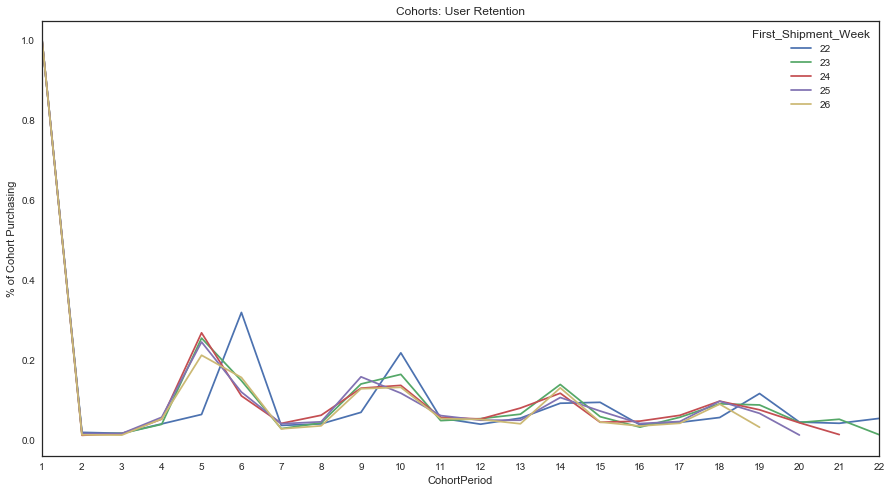

In [148]:
user_retention.plot(figsize=(15,8))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 22.1, 1))
plt.xlim(1, 22)
plt.ylabel('% of Cohort Purchasing');

#### 1) Does this differ for any of the acquisition channel groups?
#### The below heatmaps show the same result regardless of the acquisition group - the biggest drop is always at the second cohort period. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


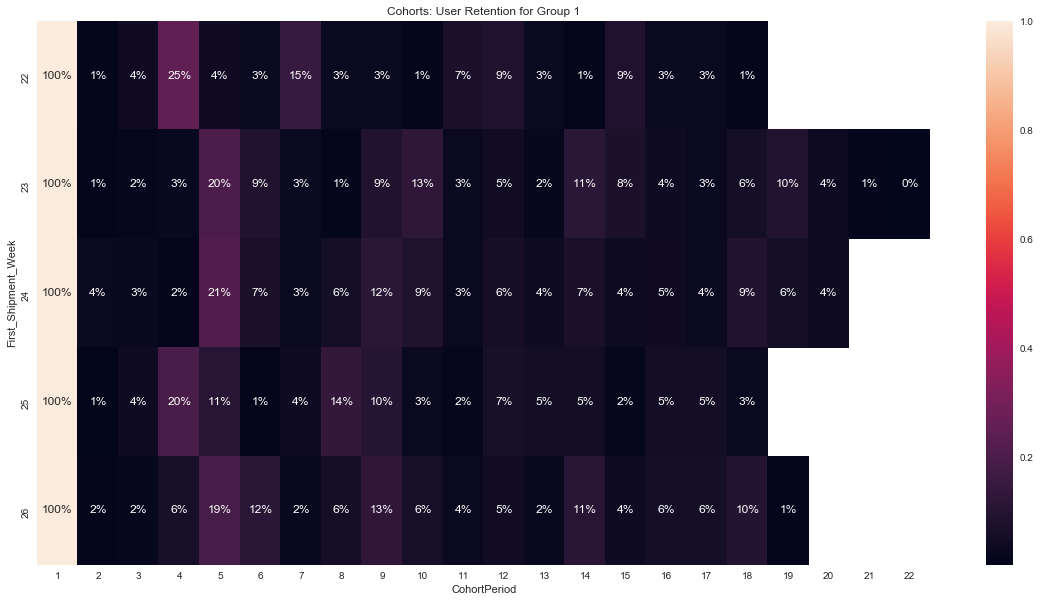

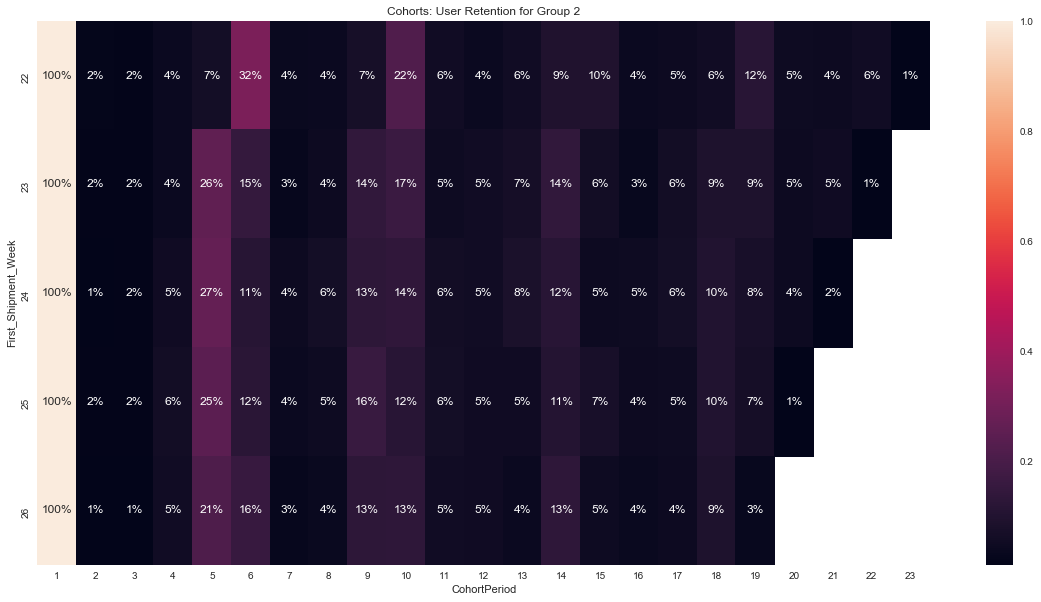

In [146]:
# Create a heatmap to compare the retention for acquisition channel group 1 and group 2 
# Repeat the above process to filter the data for group 1 
grove_1= grove[grove.Acquisition_channel_group == 1]
grove_1.set_index('Customer_ID', inplace=True)
grove_1['First_Shipment_Week'] = grove_1.groupby(level=0)['Shipment_Date'].min().apply(lambda x: x.strftime('%W'))
grove_1.reset_index(inplace=True)
grouped = grove_1.groupby(['First_Shipment_Week', 'Shipment_Week'])
cohorts = grouped.agg({'Customer_ID': pd.Series.nunique,
                       'Order_Value': np.sum})

cohorts.rename(columns={'Customer_ID': 'TotalCustomers',
                        'Order_Value': 'Revenue'}, inplace=True)
def cohort_period(grove_1):

    grove_1['CohortPeriod'] = np.arange(len(grove_1)) + 1
    return grove_1

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.reset_index(inplace=True)
cohorts.set_index(['First_Shipment_Week', 'CohortPeriod'], inplace=True)
cohort_group_size = cohorts['TotalCustomers'].groupby(level=0).first()
user_retention = cohorts['TotalCustomers'].unstack(0).divide(cohort_group_size, axis=1)

sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User Retention for Group 1')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

# Repeat the above process to filter the data for group 1 

grove_2= grove[grove.Acquisition_channel_group == 2]
grove_2.set_index('Customer_ID', inplace=True)
grove_2['First_Shipment_Week'] = grove_2.groupby(level=0)['Shipment_Date'].min().apply(lambda x: x.strftime('%W'))
grove_2.reset_index(inplace=True)
grouped = grove_2.groupby(['First_Shipment_Week', 'Shipment_Week'])
cohorts = grouped.agg({'Customer_ID': pd.Series.nunique,
                       'Order_Value': np.sum})

cohorts.rename(columns={'Customer_ID': 'TotalCustomers',
                        'Order_Value': 'Revenue'}, inplace=True)
def cohort_period(grove_2):

    grove_2['CohortPeriod'] = np.arange(len(grove_2)) + 1
    return grove_2

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.reset_index(inplace=True)
cohorts.set_index(['First_Shipment_Week', 'CohortPeriod'], inplace=True)
cohort_group_size = cohorts['TotalCustomers'].groupby(level=0).first()
user_retention = cohorts['TotalCustomers'].unstack(0).divide(cohort_group_size, axis=1)

sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User Retention for Group 2')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

#### 2) Suggest the best cutoff date in the customer lifecycle (e.g. day 5, day 20) for the acquisition team to use in their dashboard for monitoring customer retention performance of new acquisition channels, and why you feel that is the best date.

#### Looking at the line chart above again - after cohort period 14 the retention rate becomes more smooth compared to previous periods so I would suggest the acquisition team add in new acquisition channels at that period to make significant business impact

#### 3) Which is the bigger lever for revenue impact: an increase in 3+ order retention of 500 basis points or an increase in 3+ order AOV of 3? Drawing from past experience, which do you think will be easier to achieve and why?

#### An increase in 3+ order AOV of 3 will have a bigger impact on revenue based off the analysis below (1.3MM from 500 basis point increase vs 1.32MM from 3 AOV increase). From past experience increasing order volume will be easier to achieve through different marketing channels or promotions as the demand already exists whereas increasing AOV is to create consumer demand through upselling, bundling, and setting up a order minimum in order to get free shipping for online retailers. 

In [177]:
# Filter the data and calculate the total revenue/volume for 3+ order
grove_order = grove[grove.Shipment_Number >= 3] 
total_rev = np.sum(grove_order.Order_Value)
total_volume = len(grove_order.index)
AOV = total_rev/total_volume

In [189]:
# Calculate the revenue impact for an increase in 3+ order retention of 500 basis points
rev_basis_point = (total_volume*1.05)*AOV
'${:,.2f}'.format(rev_basis_point)

'$1,298,812.37'

In [190]:
# Calculate the revenue impact for an increase in 3+ order AOV of $3
rev_AOV = total_volume*(AOV+3)
'${:,.2f}'.format(rev_AOV)

'$1,319,866.16'

#### 4) Suggest two other data sets you wish you had access to and which analytic techniques you would suggest for mining the overall data set for further insights.

#### 1st data set: Product details table - SKU/product category/sub-category so we know what products each cohort orders. It's a critical piece of information as different product categories have different product cycles. 

#### 2nd data set: Media/marketing cost for each acqusition channel so we know the ROI for each channel and how profitable it is.  

#### Additional analytics technique? Using predictive modeling features to forecast the churn rate in the future and craft even more sophisticated behavioral hypotheses.  